In [1]:
import time
import sys
import random
import math
import array
import pandas as pd
#from threading import Thread 
from AutoCircleCopyRS import move_circle
from move_by_XY import moveXY
from CenterPiezoRS import center_piezo
from GrabLocation import grab_location
#from BlasterDatacollection import dataB
from Movements import move_negB,move_posB,move_negA,move_posA

<IPython.core.display.Javascript object>

In [2]:
trials = input('Enter number of trials:')
name = 'PrecisionXYTest'
t = time.localtime()
current_time = time.strftime('_%Y%m%d_%H%M%S', t)
name = name+current_time
print(name)
x = 0
y = 0

Enter number of trials:5
PrecisionXYTest_20230118_165633


In [3]:
#generate random destination
circle_r = 1.75 #radius of the circle
circle_x = 5.415049495711354 #center of the circle
circle_y = 6.654107624668449
alpha = 2 * math.pi * random.random() #random angle
r = circle_r * math.sqrt(random.random()) #random radius
randx = r * math.cos(alpha) + circle_x #calculating coordinates
randy = r * math.sin(alpha) + circle_y
print("Random point within max range:", (randx, randy))
dict = {'X': [randx], 'Y': [randy]}
df = pd.DataFrame(dict)
df.to_csv('.\Results\%s.csv' % name, mode='a', index=False, header=False)

Random point within max range: (5.436059302329089, 7.49339970120989)


<IPython.core.display.Javascript object>

,original_pos_xy,Final_pos_xy,max_xy,min_xy,Radius_x,Radius_y,Area
0,"(6.601, 7.153)","([6.601], [7.153])","(6.601, 7.153)","(6.601, 7.153)",0.0,0.0,0.0


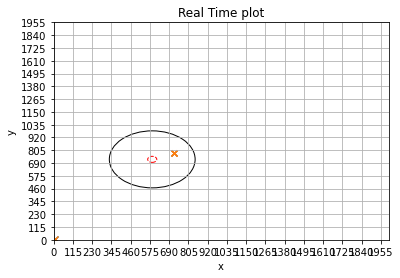

trial # 3
('USB0::0x2A8D::0x0387::CN61022130::0::INSTR', 'USB0::0xF4ED::0xEE3A::388C14124::0::INSTR', 'ASRL1::INSTR', 'ASRL3::INSTR', 'ASRL4::INSTR', 'ASRL5::INSTR', 'ASRL6::INSTR')
Configuring C1
Configuring C2
Configuring C1


In [ ]:
#loop through the test for n trials, unless condition met
n = 1 
while n <= int(trials):
    print('trial #',n)
    center_piezo() #send the piezo back to the center
        
    x,y = grab_location(name) #add new location to CSV
    print(x,y)
    dx = randx - x
    dy = randy - y
    print(dx,dy)
    
    moveXY(dx,dy) #try to move to destination
    x,y = grab_location(name)
    n += 1
    
    if (randx-.1) <= x <= (randx+.1) and (randy-.1) <= y <= (randy+.1): #check if destination reached
        print("Win condition met.")
        break
    
else:
    print('AutoTest complete.')